# neural network on top 10 most important features per recursive feature elimination package

In [ ]:
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import *
from keras import callbacks
from keras.utils.np_utils import *

print("Done Loading")


Done Loading


In [ ]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [ ]:
len(full_df[full_df.phishing == 1])

30647

In [ ]:
len(full_df[full_df.phishing != 1])

58000

# neural network model on entire dataset

In [ ]:
y = full_df.iloc[:,-1]

features = ['qty_slash_url', 'length_url', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'directory_length', 'qty_hyphen_file', 'file_length', 'asn_ip', 'time_domain_activation']
X = full_df[features]

X = tf.keras.utils.normalize(X, axis=-1, order=2)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=808)

train_X.head()

,qty_slash_url,length_url,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,directory_length,qty_hyphen_file,file_length,asn_ip,time_domain_activation
5676,0.000004,0.000042,0.000000,0.000000,0.000004,0.000004,0.000000,0.000000,1.000000,0.000591
39002,0.000000,0.004613,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,0.999989,-0.000355
1732,0.000000,0.000984,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,0.932855,0.360252
39668,0.000000,0.001769,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,0.956567,0.291508
82035,0.000000,0.000921,-0.000033,-0.000033,-0.000033,-0.000033,-0.000033,-0.000033,0.975658,0.219294


In [ ]:
tf.keras.backend.clear_session()

#neural net

top_10_nn = keras.Sequential([
                          layers.InputLayer(input_shape=[10]),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=50, activation='relu'),
                          layers.Dropout(0.20),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=111, activation='relu'),
                          layers.Flatten(),
                          layers.Dense(units=1, activation='sigmoid')
])

top_10_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), 
             tf.keras.metrics.AUC(),
             ]
)

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)


top_10_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [ ]:
history1 = top_10_nn.fit(train_X, train_y, validation_split=0.30, batch_size= 15, epochs=500, callbacks = [earlystopping])

Epoch 1/500
3103/3103 [==============================] - 11s 3ms/step - loss: 0.5886 - binary_accuracy: 0.6662 - auc: 0.6959 - val_loss: 0.5413 - val_binary_accuracy: 0.7167 - val_auc: 0.7562
Epoch 2/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.5328 - binary_accuracy: 0.7180 - auc: 0.7618 - val_loss: 0.4482 - val_binary_accuracy: 0.8173 - val_auc: 0.8967
Epoch 3/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.4313 - binary_accuracy: 0.8019 - auc: 0.8653 - val_loss: 0.3918 - val_binary_accuracy: 0.8531 - val_auc: 0.9247
Epoch 4/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.3769 - binary_accuracy: 0.8303 - auc: 0.9012 - val_loss: 0.4452 - val_binary_accuracy: 0.8631 - val_auc: 0.9361
Epoch 5/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.3843 - binary_accuracy: 0.8305 - auc: 0.8997 - val_loss: 0.3488 - val_binary_accuracy: 0.8663 - val_auc: 0.9394
Epoch 6/500
3103/3103 [=================

In [ ]:
history_df1 = pd.DataFrame(history1.history)

history_df1.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.327842,0.861537,0.921357,0.312877,0.883383,0.948000
std,0.050828,0.034707,0.034897,0.058290,0.034007,0.028391
min,0.279848,0.681278,0.726816,0.240178,0.716735,0.756242
25%,0.298626,0.856959,0.920186,0.271094,0.877544,0.949727
50%,0.310347,0.873096,0.931254,0.299880,0.894666,0.952754
75%,0.339360,0.879112,0.937117,0.333826,0.903665,0.958165
max,0.570114,0.887320,0.943678,0.541257,0.911411,0.962498


In [ ]:
train_acc = top_10_nn.evaluate(train_X, train_y)
test_acc = top_10_nn.evaluate(val_X, val_y)

693/693 [==============================] - 1s 1ms/step - loss: 0.2653 - binary_accuracy: 0.9092 - auc: 0.9558


In [ ]:
dict(zip(top_10_nn.metrics_names, test_acc))

{'auc': 0.9557706117630005,
 'binary_accuracy': 0.9092139601707458,
 'loss': 0.26526567339897156}

Minimum validation loss (binary_crossentropy): 0.24017752707004547


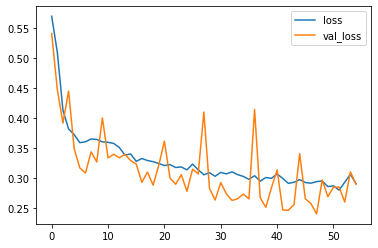

In [ ]:
history_df1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df1['val_loss'].min()))

Maximum AUC: 0.9624983072280884


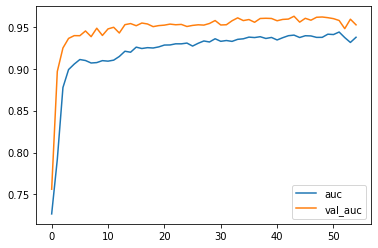

In [ ]:
history_df1.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df1['val_auc'].max()))

Maximum validation binary accuracy: 0.9114108085632324


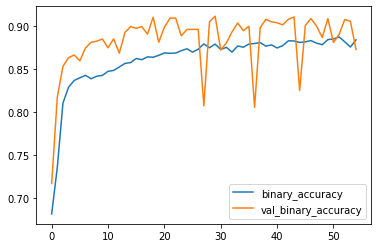

In [ ]:
history_df1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df1['val_binary_accuracy'].max()))

In [ ]:
history_df1.binary_accuracy.max() - history_df1.val_binary_accuracy.max()

-0.024090468883514404

In [ ]:
preds1 = top_10_nn.predict(val_X)
preds1

array([[0.8907678 ],
       [0.01719761],
       [0.80778307],
       ...,
       [0.3034043 ],
       [0.03777122],
       [0.8793068 ]], dtype=float32)

In [ ]:
len(preds1[preds1 <= 0.5])

13591

In [ ]:
len(preds1[preds1 > 0.5])

8571

In [ ]:
len(val_y)

22162

In [ ]:
preds_df = pd.DataFrame(preds1, columns = ['preds'])

preds_df.head()

,preds
0,0.890768
1,0.017198
2,0.807783
3,0.059062
4,0.808833


In [ ]:
preds_df = pd.concat([preds_df, val_y.reset_index(drop=True), val_X.reset_index()], axis=1)

preds_df

,preds,phishing,index,qty_slash_url,length_url,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,directory_length,qty_hyphen_file,file_length,asn_ip,time_domain_activation
0,0.890768,1,62575,0.002483,0.025323,0.000000,0.000000,0.002483,0.016882,0.000000,0.004965,-0.000497,0.999518
1,0.017198,0,38126,0.000000,0.001221,-0.000047,-0.000047,-0.000047,-0.000047,-0.000047,-0.000047,0.949305,0.314353
2,0.807783,0,1617,0.000069,0.002349,0.000069,0.000000,0.000069,0.001036,0.000069,0.000967,0.921329,0.388775
3,0.059062,0,8228,0.000000,0.000298,-0.000021,-0.000021,-0.000021,-0.000021,-0.000021,-0.000021,0.992151,0.125046
4,0.808833,1,55594,0.060550,0.847707,0.000000,0.030275,0.060550,0.423853,0.000000,0.302752,-0.030275,-0.030275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.002891,0,65294,0.000000,0.001558,-0.000092,-0.000092,-0.000092,-0.000092,-0.000092,-0.000092,0.720224,0.693739
22158,0.007090,0,10038,0.000000,0.001086,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,-0.000068,0.904747,0.425947
22159,0.303404,0,43642,0.000000,0.001711,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,-0.000074,0.999999,-0.000074
22160,0.037771,0,73632,0.000000,0.000730,-0.000028,-0.000028,-0.000028,-0.000028,-0.000028,-0.000028,0.980816,0.194933


In [ ]:
pred_classes = np.argmax(preds1, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_y, pred_classes)
print(cm)

[[14519     0]
 [ 7643     0]]
